<a href="https://colab.research.google.com/github/sejalagrawal/selfdrivecar_1/blob/main/MNIST_imageRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random




In [101]:
np.random.seed(0)

In [102]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [103]:
assert(X_train.shape[0]==y_train.shape[0]), "The no of images not equal to no of labels"
assert(X_test.shape[0]==y_test.shape[0]), "The no of images not equal to no of labels"
assert(X_train.shape[1:]== (28,28)),"Image dimention is not 28X28"
assert(X_test.shape[1:]== (28,28)),"Image dimention is not 28X28"

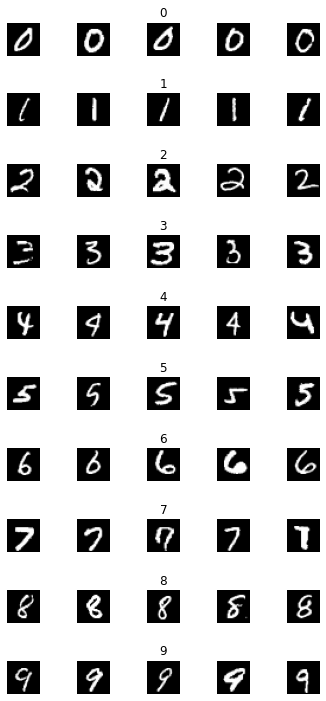

In [104]:
num_samples = []

cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)), :, :], cmap = plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_samples.append(len(x_selected))
      

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'No of images')

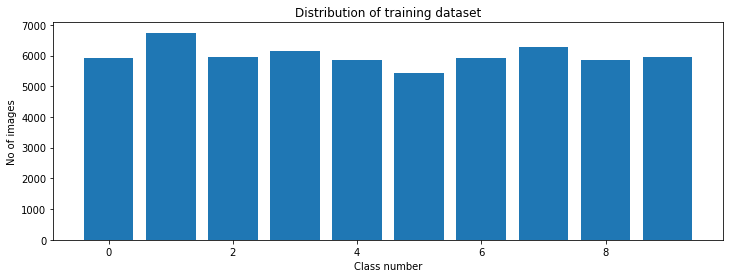

In [105]:
print(num_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_samples)
plt.title("Distribution of training dataset")
plt.xlabel("Class number")
plt.ylabel("No of images")

In [106]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [107]:
X_train = X_train/255
X_test = X_test/255

In [108]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [109]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [110]:
model = create_model()
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
270/270 [==============================] - 2s 4ms/step - loss: 0.9640 - accuracy: 0.6693 - val_loss: 0.3068 - val_accuracy: 0.9097
Epoch 2/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3580 - accuracy: 0.8927 - val_loss: 0.2643 - val_accuracy: 0.9208
Epoch 3/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3141 - accuracy: 0.9082 - val_loss: 0.2362 - val_accuracy: 0.9303
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.3012 - accuracy: 0.9114 - val_loss: 0.2342 - val_accuracy: 0.9320
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2769 - accuracy: 0.9168 - val_loss: 0.2358 - val_accuracy: 0.9308
Epoch 6/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2679 - accuracy: 0.9211 - val_loss: 0.2179 - val_accuracy: 0.9342
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2508 - accuracy: 0.9277 - val_loss: 0.2211 - val_accuracy: 0.9352
Epoch 

Text(0.5, 0, 'epoch')

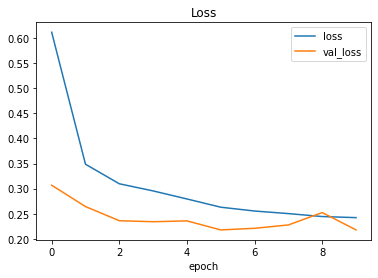

In [111]:
his = keras.callbacks.History()
model.fit(X_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1, callbacks=[his])
his.history.keys()
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

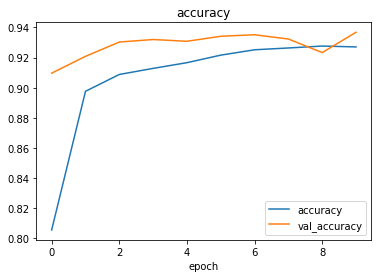

In [112]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

In [113]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(type(score))
print('Test score : ', score[0])
print('Test accuracy : ', score[1])

<class 'list'>
Test score :  0.2561410367488861
Test accuracy :  0.9283000230789185


<Response [200]>


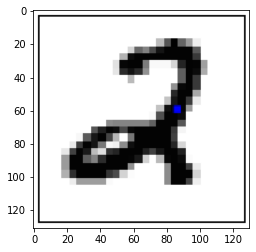

In [114]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream = True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

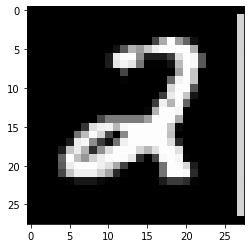

In [115]:
import cv2
img_array = np.asarray(img)
#print(img_array.shape)
resized = cv2.resize(img_array, (28,28))
#print(resized.shape)
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))
#print(image)


In [116]:
image - image/255
image = image.reshape(1, 784)


In [117]:
prediction = model.predict_classes(image)
print("predicted digit", str( prediction))

predicted digit [2]


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
